In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import os
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
%matplotlib inline 
import matplotlib.pyplot as plt

In [10]:
parkinson_ox = pd.read_csv(r"C:\Users\Amulya\Downloads\Parkinsons\Parkinsons.csv")

parkinson_ox.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [11]:
parkinson_ox.shape

(756, 755)

In [15]:


parkinson_ox.isnull().any().sum()

0

In [13]:
parkinson_ox.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [14]:
parkinson_ox.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

In [16]:
parkinson_ox['class'].value_counts(normalize=True)

class
1    0.746032
0    0.253968
Name: proportion, dtype: float64

[Text(0.5, 1.0, '0 absent/healthy and 1 present/PD')]

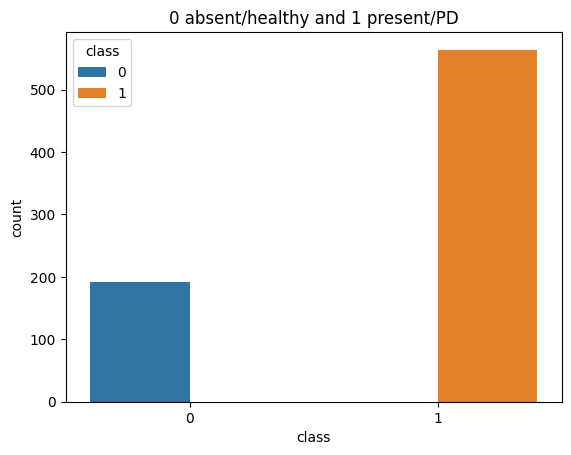

In [17]:
sns.countplot(data=parkinson_ox , x='class', hue='class').set(title = "0 absent/healthy and 1 present/PD")

In [18]:
parkinson_ox.drop(['id'], axis = 1, inplace = True) 

In [19]:
y =  parkinson_ox['class']

In [20]:
parkinson_ox.drop(['class'], axis = 1, inplace = True) 

In [21]:
X = parkinson_ox.copy()

In [22]:
y = y.copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (604, 753) (604,)
Test set: (152, 753) (152,)


In [24]:
scaler = StandardScaler() 

In [25]:
X_train = scaler.fit_transform(X_train.to_numpy())

In [26]:
X_test =  scaler.transform(X_test.to_numpy()) 

In [27]:
X_train = np.asarray(X_train)
X_train.shape 

(604, 753)

In [28]:
X_test = np.asarray(X_test)
X_test.shape

(152, 753)

In [29]:
from snapml import RandomForestClassifier as SnapForest


rf = SnapForest(n_estimators=10, criterion='gini', 
                            max_depth=4, min_samples_leaf=1, 
                            max_features='auto', bootstrap=True, 
                            n_jobs=1, random_state=None, verbose=False, 
                            use_histograms=False, hist_nbins=256, 
                            use_gpu=False, gpu_ids=[0], 
                            compress_trees=False)


In [30]:
clf = rf.fit(X_train, np.asarray(y_train))

In [31]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           0       0.90      0.46      0.61        39
           1       0.84      0.98      0.91       113

    accuracy                           0.85       152
   macro avg       0.87      0.72      0.76       152
weighted avg       0.86      0.85      0.83       152

Confusion matrix, without normalization
[[ 18  21]
 [  2 111]]
Accuracy: 0.8487
Jaccard score: 0.8284
Precision: 0.8409
Recall: 0.9823
Avg F1-score: 0.8302


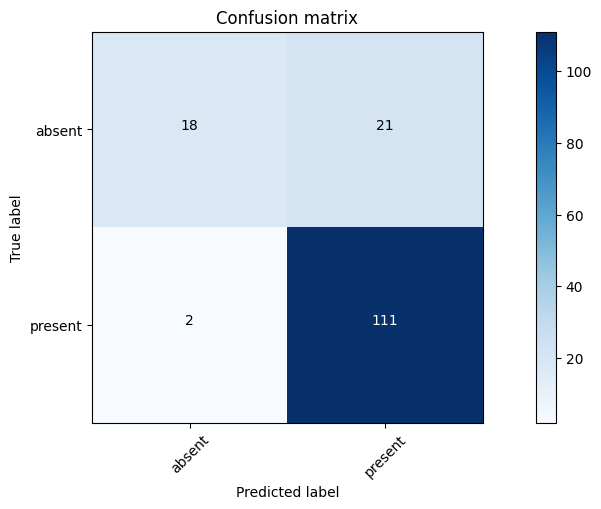

In [33]:
cnf_matrix = confusion_matrix(y_test, yhat)


print (classification_report(y_test, yhat,labels=np.unique(yhat)))

plt.figure(figsize=(11,5))
plot_confusion_matrix(cnf_matrix, ['absent','present'],normalize= False,  title='Confusion matrix')
from sklearn.metrics import f1_score, precision_score, jaccard_score, accuracy_score, recall_score 
print("Accuracy: %.4f" % accuracy_score(y_test, yhat))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat))
print("Precision: %.4f" % precision_score(y_test, yhat))
print("Recall: %.4f" % recall_score(y_test, yhat))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))


In [34]:
from snapml import BoostingMachineClassifier as BoostMachine

Booting_clf = BoostMachine(n_jobs=1, num_round=100, max_depth=4, 
                                 min_max_depth=1, max_max_depth=5, early_stopping_rounds=10, 
                                 random_state=0, base_score=None, learning_rate=0.1, verbose=False, 
                                 compress_trees=False, class_weight=None, use_histograms=True, 
                                 hist_nbins=256, use_gpu=False, gpu_ids=[0], colsample_bytree=1.0,
                                 subsample=1.0, lambda_l2=0.0, 
                                 tree_select_probability=1.0, regularizer=1.0,
                                 fit_intercept=False, gamma=1.0, n_components=10)


Booting_clf.fit(X_train, y_train) 
yhat2 = Booting_clf.predict(X_test)

print("Accuracy: %.4f" % accuracy_score(y_test, yhat2))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))
print("Precision: %.4f" % precision_score(y_test, yhat2))
print("Recall: %.4f" % recall_score(y_test, yhat2))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))


Accuracy: 0.8618
Jaccard score: 0.8359
Precision: 0.8770
Recall: 0.9469
Avg F1-score: 0.8555


              precision    recall  f1-score   support

           0       0.80      0.62      0.70        39
           1       0.88      0.95      0.91       113

    accuracy                           0.86       152
   macro avg       0.84      0.78      0.80       152
weighted avg       0.86      0.86      0.86       152

Confusion matrix, without normalization
[[ 24  15]
 [  6 107]]


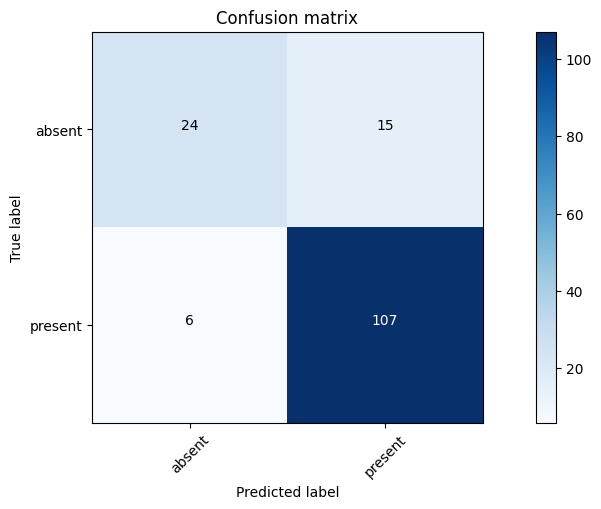

In [35]:
cnf_matrix = confusion_matrix(y_test, yhat2)
print (classification_report(y_test, yhat2,labels=np.unique(yhat2)))
plt.figure(figsize=(11,5))
plot_confusion_matrix(cnf_matrix, classes=['absent','present'],normalize= False,  title='Confusion matrix')


In [36]:
import pickle
with open('Parkinson_ox(RF-snapML).pickle', 'wb') as to_write:
    pickle.dump(rf, to_write) 

with open('Parkinson_ox(RF-snapML).pickle', 'rb') as to_read:
    rf_snapML = pickle.load(to_read)

In [ ]:
import pickle


with open('Parkinson_ox(Boost-snapML).pickle', 'wb') as to_write:
    pickle.dump(Booting_clf, to_write) 

with open('Parkinson_ox(Boost-snapML).pickle', 'rb') as to_read:
    boosting_snapML = pickle.load(to_read)